# Importando bibliotecas

**Name:**
**Year:**
**Month:**
**Day:**
**Hour:**
**Lat:**
**Long:**
**Status:**
**Category:**
**Wind:**
**Pressure:**
**Tropicalstorm_force_diamete:**
**hurricane_force_diameter:**

# Questões a serem respondidas?

1. Ver quais as tempestades com maior ocorrência? (nome, category, status)
2. Qual a maior velocidade do vento e pressão?
3. Qual a maior ocorrência das tempestades em um período de tempo (dia, mes, ano ) -> Desafio semanas
4. Qual a localidade que sofreu mais tempestades. (independente das variaveis?). Exemplo: A cidade que teve maior frequência de tempestades
5. Em quais localidades as tempestades (por status) ocorreram. Exemplo: Hurricane houve a maior concentração no Alabama, porém a depressão em Michigan e New York
6. Quais as localidade mais afetadas, por um determinado Tempestade. Exemplo: A Carrie ocorreu com maior frequência em New York e Florida.
7. Ano que teve mais tempestades.


## Determinar categorias por tipo de tempestade

> Como podemos determinar as categorias pelos tipos de tempestades.


 ## Importando todas as biblioteca necessárias


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Estudar bibliotecas
# FOLIUM => https://jacobtadesse.com/2019/09/28/visualizing-pandas-dataframe-lat-long-with-folium-maps/
# GEOPLOT => https://medium.com/geekculture/geospatial-visualization-with-geoplot-in-python-40b3de35ce0d

### Carregando os Datasets

> Iremos juntar todos os dados em apenas um único DataFrame
    > O arquivo storms.csv contém tempestades da época de 1950 aos dias atuais
    > Já storms_updated.csv contém dados de 1852 a 1950
Quando já finalizamos a junção dos dados, iremos realizar um sort dos valores por ano, mês e dia

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms_updated.csv')
df = pd.concat([df1, df2])\
        .sort_values(by=['year', 'month', 'day'], ascending=[True, True, True])\
        .reset_index(drop=True)
df

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011852,1852,8,26,6,30.2,-88.6,hurricane,3,100,961,NaN,NaN
1,AL031853,1853,9,3,12,19.7,-56.2,hurricane,4,130,924,NaN,NaN
2,AL031854,1854,9,7,12,28.0,-78.6,hurricane,3,110,938,NaN,NaN
3,AL031854,1854,9,8,18,31.6,-81.1,hurricane,3,100,950,NaN,NaN
4,AL031854,1854,9,8,20,31.7,-81.1,hurricane,3,100,950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30011,Wanda,2021,11,6,18,37.1,-38.0,tropical storm,0,35,1002,100.0,0.0
30012,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0
30013,Wanda,2021,11,7,6,38.1,-36.4,tropical storm,0,35,1004,60.0,0.0
30014,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0


In [4]:
df = df.drop(columns=['hour'])

# Tratamento de dados
>O tratamento de dados é algo muito importante, no qual analisamos o nosso dataset por completo, para verificar, se precisaremos realizar tratamentos, como tipo das colunas, valores nulos.


Analisaremos a integridade dos dados, ou seja, inicialmente verificaremos a quantidade de dados nulos.

In [5]:
df.isna().sum()

name                                0
year                                0
month                               0
day                                 0
lat                                 0
long                                0
status                              0
category                            0
wind                                0
pressure                            0
tropicalstorm_force_diameter    17551
hurricane_force_diameter        17551
dtype: int64

Como podemos perceber no código acima `df.isna().sum()`, nos relata a quantidade de dados nulos em cada coluna. Para uma melhor visualização dos dados nulos iremos separalos em outro dataframe

In [6]:
# Filtrando apenas as colunas com valores maiores que 0.
# TODO: Criar texto explicando o por que da analise sobre estas colunas e se há necessidade de tratar.
index_1 = list(df.loc[pd.isna(df.tropicalstorm_force_diameter), :].index)
index_2 = list(df.loc[pd.isna(df.hurricane_force_diameter), :].index)
all_nan_ind = list(set(index_1 + index_2))
len(all_nan_ind)
# half_empty_columns_df
half_empty_columns_df = df.filter(items = all_nan_ind, axis=0)
half_empty_columns_df

,name,year,month,day,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011852,1852,8,26,30.2,-88.6,hurricane,3,100,961,NaN,NaN
1,AL031853,1853,9,3,19.7,-56.2,hurricane,4,130,924,NaN,NaN
2,AL031854,1854,9,7,28.0,-78.6,hurricane,3,110,938,NaN,NaN
3,AL031854,1854,9,8,31.6,-81.1,hurricane,3,100,950,NaN,NaN
4,AL031854,1854,9,8,31.7,-81.1,hurricane,3,100,950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22452,Harvey,2011,8,20,17.0,-88.3,tropical storm,0,55,995,NaN,NaN
22466,Irene,2011,8,21,17.8,-64.6,tropical storm,0,60,993,NaN,NaN
22476,Irene,2011,8,22,18.1,-65.8,tropical storm,0,60,990,NaN,NaN
22487,Irene,2011,8,24,22.4,-74.0,hurricane,3,100,955,NaN,NaN


Quais os tipos de dados das colunas?

In [7]:
df.dtypes

name                             object
year                              int64
month                             int64
day                               int64
lat                             float64
long                            float64
status                           object
category                          int64
wind                              int64
pressure                          int64
tropicalstorm_force_diameter    float64
hurricane_force_diameter        float64
dtype: object

Todos os tipos dados estão corretos para a nossa analise, logo não precisaremos realizar nenhuma conversão. Vamos adicionar uma nova coluna chamada **date** para facilitar a nossa busca por datas.

In [8]:
def format_date_field(row):
        date=datetime(row['year'], row['month'], row['day'])
        row['date'] = pd.to_datetime(date)
        return row

df = df.apply(lambda row: format_date_field(row), axis=1)
df['date']

0       1852-08-26
1       1853-09-03
2       1854-09-07
3       1854-09-08
4       1854-09-08
           ...    
30011   2021-11-06
30012   2021-11-07
30013   2021-11-07
30014   2021-11-07
30015   2021-11-07
Name: date, Length: 30016, dtype: datetime64[ns]

Como podemos ver a coluna **date** é do tipo **datetime**, o que queriamos.
Podemos agora excluir as colunas **year**, **month**, **day**

In [9]:
df[['date', 'year', 'month', 'day']].sample(2)

,date,year,month,day
24270,2013-09-17,2013,9,17
10754,1995-07-18,1995,7,18


Iremos converter a coluna **wind** para km/h, pois está como **knots**

In [71]:
df['wind km/h'] = df['wind'].apply(lambda x: x*1.852)
df.rename(columns={'wind':'wind kn'}, inplace=True)
df[['wind kn','wind km/h']].head()

KeyError: 'wind'

# Analisando os dados
Começaremos a analisar os dados e responder as nossas questões

In [10]:
df = df.drop(columns=['year', 'month', 'day'])

# Analise Exploratória

> Inicialmente iremos verificar a maior ocorrência de tempestades.
> **OBS:** É importante ressaltar que não pegaremos todas as tempestades

In [31]:
print(f"O total de tempestades registradas foram {len(df['name'].unique().tolist())}")

O total de tempestades registradas foram 651


Como podemos ver, o total de tempestades registradas é de 651, mas nem todas elas possuem um nome de fato, umas só possuem um código. Vamos demonstrar:

In [34]:
# Filtrando as tempestades (cujo nem todos os caracteres estão no alfabeto)
df_not_real_names = df[~df['name'].str.isalpha()]

# Filtrando as tempestades (cujo todos os caracteres estão no alfabeto)
df_real_names = df[df['name'].str.isalpha()]

# Visualizando estas separações
display(df_real_names['name'][:5],
        df_not_real_names['name'][:5])

602    Able
603    Able
604    Able
605    Able
606    Able
Name: name, dtype: object

0    AL011852
1    AL031853
2    AL031854
3    AL031854
4    AL031854
Name: name, dtype: object

In [11]:
df_real_names.sample(20)

,name,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date
602,Able,22.0,-63.2,tropical storm,0,55,997,NaN,NaN,1950-08-13
603,Able,22.7,-63.8,tropical storm,0,60,995,NaN,NaN,1950-08-14
604,Able,23.4,-65.4,tropical storm,0,60,995,NaN,NaN,1950-08-14
605,Able,23.9,-66.0,hurricane,1,65,989,NaN,NaN,1950-08-14
606,Able,25.2,-66.8,hurricane,1,70,987,NaN,NaN,1950-08-15
...,...,...,...,...,...,...,...,...,...,...
30011,Wanda,37.1,-38.0,tropical storm,0,35,1002,100.0,0.0,2021-11-06
30012,Wanda,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0,2021-11-07
30013,Wanda,38.1,-36.4,tropical storm,0,35,1004,60.0,0.0,2021-11-07
30014,Wanda,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0,2021-11-07


### 1. Visualizando as tempestades com maior ocorrência
> Para visualizar as tempestades com maior ocorrência, iremos realizar outro filtro, baseado na contagem dos valores. E também voltado apenas nas tempestades com nomes reais

C:\Users\jefer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


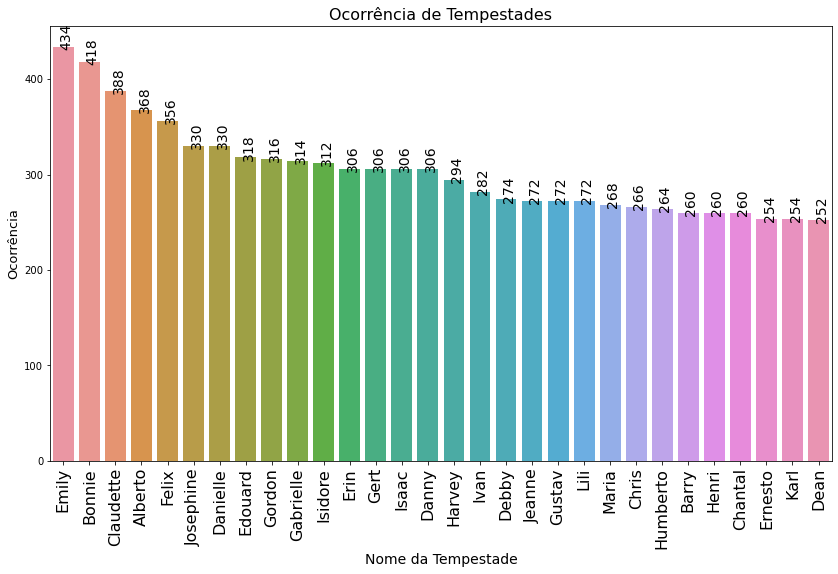

In [67]:
# Filtering date based on "name" and count of each values
most_frequent_storms = df_real_names[df_real_names['name'].isin(
        df_real_names['name'].value_counts()[df_real_names['name'].value_counts()>250].index)]

# Order by clause, to sort the graphic plot
order_by_clause = most_frequent_storms['name'].value_counts().index

fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(most_frequent_storms['name'], order=order_by_clause, ax=ax)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    (p.get_x()+0.25, p.get_height()+0.1),
                    rotation=90,
                    fontsize=14)
plt.title("Ocorrência de Tempestades", fontsize=16)
plt.xlabel("Nome da Tempestade", fontsize=14)
plt.ylabel("Ocorrência", fontsize=13)
plt.xticks(rotation=90, fontsize=16)
plt.show()

**Com a plotagem do gráfico acima, podemos visualizar que as tempestades com maior ocorrência, foram:**

1. Emily (434 ocorrências);
2. Bonnie (418 ocorrências);
3. Claudette (388 ocorrências);
4. Alberto (368 ocorrências);
5. Felix (356 ocorrências).

In [13]:
# df[['status', 'category']].count_values()
df.groupby(by='status')

In [14]:
df.status.unique()

array(['hurricane', 'tropical storm', 'tropical depression'], dtype=object)

<AxesSubplot:xlabel='category', ylabel='count'>

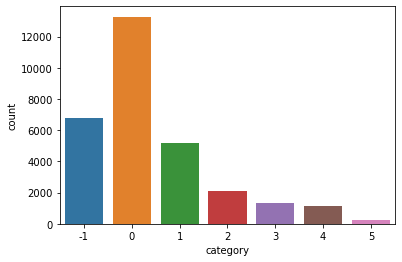

In [15]:
sns.countplot(x='category', data=df)

<AxesSubplot:xlabel='status', ylabel='count'>

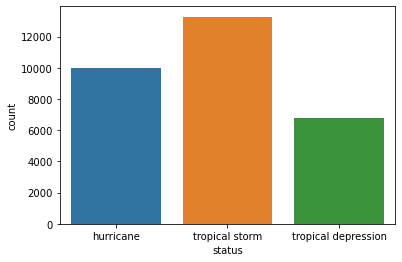

In [16]:
sns.countplot(x='status', data=df)

In [17]:
# Separar por tipo de status
df.status.unique()

array(['hurricane', 'tropical storm', 'tropical depression'], dtype=object)

In [18]:
# testando teste 123 remover texto fake sqn

# Plotando informações em um gráfico


In [83]:
!pip install folium
!pip install folium pandas
!pip install cartopy
!pip install geoplot

  Using cached Cartopy-0.20.3.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting re

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jefer\anaconda3\python.exe' 'C:\Users\jefer\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\jefer\AppData\Local\Temp\tmpjlwhfjg5'
       cwd: C:\Users\jefer\AppData\Local\Temp\pip-install-dnbl8sfj\cartopy_696822add54b400ab0a4302ac60b9ebf
  Complete output (2 lines):
  <string>:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  Proj 8.0.0 must be installed.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jefer\anaconda3\python.exe' 'C:\Users\jefer\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\jefer\AppData\Local\Temp\tmpkxuaarag'
       cwd: C:\Users\jefer\AppData\Local\Temp\pip-install-dnbl8sfj\cartopy_16e8f377a4b44c008ede1a2dd871bd95
  Complete output (2 lines):
  <string>


  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)
  Using cached Cartopy-0.17.0.tar.gz (8.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.16.0.tar.gz (8.8 MB)
  Using cached Cartopy-0.15.1.tar.gz (8.2 MB)
  Using cached Cartopy-0.14.2.tar.gz (8.4 MB)
  Using cached Cartopy-0.14.0.tar.gz (8.4 MB)
  Using cached Cartopy-0.13.1.tar.gz (7.7 MB)
  Using cached Cartopy-0.13.0.tar.gz (7.7 MB)
  Using cached Cartopy-0.12.0.5.tar.gz (7.7 MB)
  Using cached Cartopy-0.12.0.4.tar.gz (7.7 MB)
  Using cached cartopy-0.11.0.tar.gz (7.7 MB)
 

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jefer\anaconda3\python.exe' 'C:\Users\jefer\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\jefer\AppData\Local\Temp\tmpyewz04vr'
       cwd: C:\Users\jefer\AppData\Local\Temp\pip-install-qw8psxew\cartopy_b2204781f28e4698a773211d022e799e
  Complete output (2 lines):
  <string>:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  Proj 8.0.0 must be installed.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jefer\anaconda3\python.exe' 'C:\Users\jefer\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\jefer\AppData\Local\Temp\tmpu_e7gk2s'
       cwd: C:\Users\jefer\AppData\Local\Temp\pip-install-qw8psxew\cartopy_8a711f7bf13849d688f055cca4442054
  Complete output (2 lines):
  <string>

  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with

      warnings.warn(
    Proj4 4.9.0 must be installed.
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\jefer\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jefer\\AppData\\Local\\Temp\\pip-install-qw8psxew\\cartopy_1b2a9d134036426b9cb8da8b297f00a8\\setup.py'"'"'; __file__='"'"'C:\\Users\\jefer\\AppData\\Local\\Temp\\pip-install-qw8psxew\\cartopy_1b2a9d134036426b9cb8da8b297f00a8\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\jefer\AppData\Local\Temp\pip-pip-egg-info-xn9ipw50'
         cwd: C:\Users\jefer\AppData\Local\Temp\pip-install-qw8psxew\cartopy_1b2a9d134036426b9cb8da8b297f00a8\
    Complete output (3 lines):
    C:\Users\jefer\AppData\Local\Temp\pip-install-qw8psxew\cartopy_1b2a9d134036426b9cb8da8b297f00a8\set

In [93]:
import folium
from folium import plugins
lat = df_real_names['lat'].mean()
long = df_real_names['long'].mean()
# lat = df['lat']
# lon = df['long']
localization = df_real_names[['lat', 'long']].values

map = folium.Map([lat, long], zoom_start=3)
map
map.add_child(plugins.HeatMap(localization, radius=15))